## Module 1, Step 2 : Create Binary Classification Model
### Import Library

In [1]:
import tensorflow as tf
import json, sys
import matplotlib.pyplot as plt
sys.path.append("/usr/grading")
import grad

### Read Credential

In [2]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [3]:
base_dir = "./dataset"

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [5]:
img_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=8,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=2,
    subset='validation')

Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [6]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                746512    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Model Training

In [19]:
# Cek Available RAM terlebih dahulu
!free -h

              total        used        free      shared  buff/cache   available
Mem:           3,9G        3,1G        546M         30M        258M        605M
Swap:          1,9G        1,7G        227M


In [18]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

[sudo] password for trainercv: 

In [20]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 10, 
                      validation_data = validation_generator, 
                      verbose = 1)

Epoch 1/10
4/4 [==============================] - 3s 594ms/step - loss: 2.3760e-04 - accuracy: 1.0000 - val_loss: 7.2249e-05 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 2s 442ms/step - loss: 1.3251e-04 - accuracy: 1.0000 - val_loss: 4.3434e-05 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 519ms/step - loss: 8.2080e-05 - accuracy: 1.0000 - val_loss: 3.1610e-05 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 452ms/step - loss: 6.0120e-05 - accuracy: 1.0000 - val_loss: 2.7931e-05 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 2s 435ms/step - loss: 4.7988e-05 - accuracy: 1.0000 - val_loss: 2.7393e-05 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 419ms/step - loss: 4.0705e-05 - accuracy: 1.0000 - val_loss: 2.6449e-05 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 405ms/step - loss: 3.7865e-05 - accuracy: 1.0000 - val_loss

### Model Evaluation

In [23]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]}\nLoss test = {stats[0]}')

4/4 [==============================] - 1s 78ms/step - loss: 1.7200e-05 - accuracy: 1.0000
Accuracy test = 1.0
Loss test = 1.7200280126417056e-05


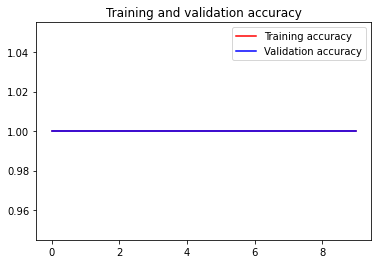

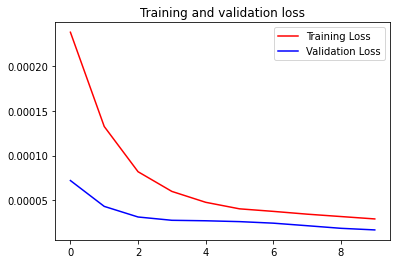

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
validation_generator.class_indices

{'empty': 0, 'myface': 1}

### Model Saving

In [25]:
model.save('model_module-1.h5')

### Grading

In [ ]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
grad.doGrade(usermail, 1, 2, stats)